**Daegu Apartment**

[Dataset Daegu Apartment](https://drive.google.com/drive/folders/1fmkyfjrzuJNaH02sXhp5vUxqum9bH0Fx) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****


##  Business Context
Pasar properti di Kota Daegu, Korea Selatan mengalami pertumbuhan pesat seiring dengan meningkatnya permintaan terhadap hunian apartemen.  
Harga apartemen dipengaruhi oleh banyak faktor seperti ukuran unit, usia bangunan, jumlah fasilitas, serta akses terhadap transportasi publik seperti stasiun subway.  
Namun, sering kali pihak developer, agen real estate, maupun calon pembeli mengalami kesulitan dalam memperkirakan harga pasar yang wajar karena variabel-variabel tersebut bersifat kompleks dan saling berpengaruh.  

Dengan memanfaatkan machine learning, perusahaan atau pihak terkait dapat membangun sistem prediksi harga yang lebih objektif, cepat, dan akurat.  
Model ini dapat membantu pengambilan keputusan dalam hal penentuan harga jual, investasi, dan strategi pemasaran properti.

---

##  Problem Statement
Saat ini, penentuan harga apartemen masih banyak dilakukan secara manual dengan mempertimbangkan pengalaman atau perbandingan harga di pasar.  
Pendekatan tersebut tidak selalu akurat karena:
- Faktor-faktor seperti ukuran unit, usia bangunan, dan jumlah fasilitas tidak memiliki bobot pengaruh yang tetap.  
- Kondisi lingkungan dan akses transportasi juga berperan besar tetapi sulit untuk dikalkulasi secara langsung.  
- Tidak ada alat bantu yang dapat memberikan estimasi harga secara konsisten dan terukur.

Akibatnya, developer atau agen properti berisiko melakukan kesalahan penentuan harga, yang berdampak pada:
- Harga jual terlalu tinggi → properti sulit terjual.  
- Harga jual terlalu rendah → potensi kerugian finansial.  

---

##  Project Goals
Tujuan utama dari project ini adalah:
1. Membangun model machine learning (regresi) yang dapat memprediksi harga jual apartemen di Daegu berdasarkan data historis.  
2. Mengidentifikasi fitur-fitur utama yang paling berpengaruh terhadap harga jual (misalnya ukuran unit, fasilitas, tahun pembangunan, dan jarak ke subway).  
3. Meningkatkan efisiensi proses estimasi harga sehingga pihak bisnis dapat:
   - Melakukan penilaian harga properti secara otomatis dan cepat.
   - Membuat keputusan harga jual yang kompetitif dan rasional.
   - Mengurangi risiko kesalahan dalam strategi penetapan harga.

---

### **Data Understanding**

Features
-	Hallway Type: Apartment type
-	TimeToSubway: Time needed to the nearest subway station
-	SubwayStation: The name of the nearest subway station
-	N_FacilitiesNearBy(ETC): The number of facilities nearby
-	N_FacilitiesNearBy(PublicOffice): The number of public office facilities nearby
-	N_SchoolNearBy(University): The number of universities nearby
-	N_Parkinglot(Basement): The number of the parking lot
-	YearBuilt: The year the apartment was built
-	N_FacilitiesInApt: Number of facilities in the apartment
-	Size(sqft): The apartment size (in square feet)
-	SalePrice: The apartment price (Won)

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [61]:
df = pd.read_csv("data_daegu_apartment.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [62]:
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [63]:
df['TimeToSubway'].unique()

array(['0-5min', '10min~15min', '15min~20min', '5min~10min',
       'no_bus_stop_nearby'], dtype=object)

In [64]:
df['YearBuilt'].min()

np.int64(1978)

In [65]:
print(f"Missing Values: \n", df.isna().sum())
print(f"Duplicated data:\n", df.duplicated().sum())

Missing Values: 
 HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64
Duplicated data:
 1422


In [66]:
df_model = df.copy()

**Data Preprocessing**

In [67]:
print("\nMissing Values per Kolom:")
print(df_model.isna().sum())

print("\nJumlah duplikat:", df_model.duplicated().sum())

# Drop duplikat (jika ada)
df_model = df_model.drop_duplicates()


Missing Values per Kolom:
HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

Jumlah duplikat: 1422


In [68]:
df_model['YearBuilt'].max()

np.int64(2015)

In [69]:
df_model['AptAge'] = 2015 - df['YearBuilt']

<Axes: >

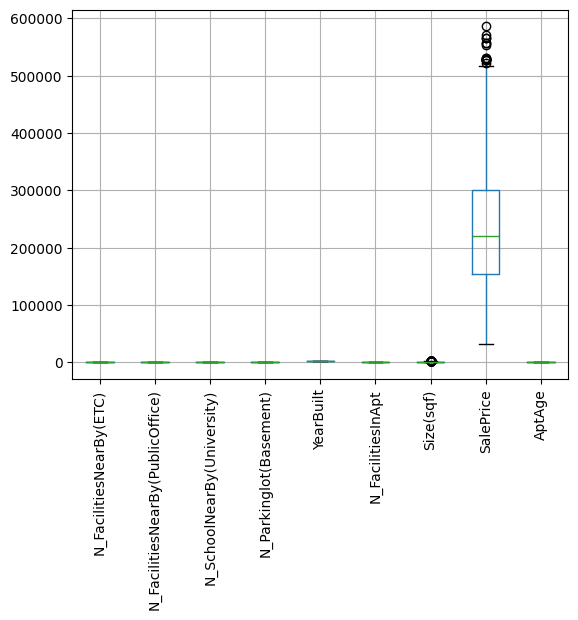

In [70]:
df_model.boxplot(rot=90)

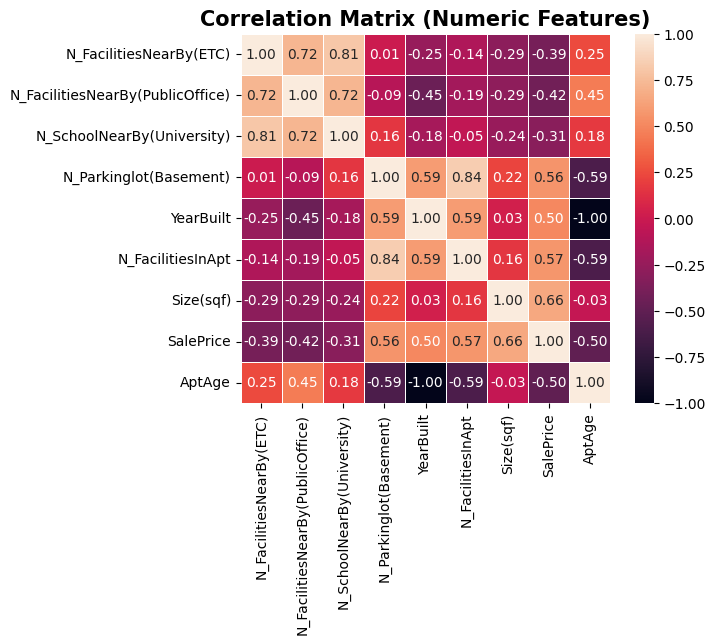

In [71]:
corr = df_model.select_dtypes(include=[np.number]).corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', square=True, linewidths=.5)
plt.title('Correlation Matrix (Numeric Features)', size=15, weight='bold')
plt.show()

### Insight
- Variabel ukuran apartemen (Size) adalah prediktor paling kuat untuk harga jual.
- Umur bangunan (AptAge/YearBuilt) juga krusial: apartemen baru lebih mahal.
- Terlalu banyak fasilitas umum di sekitar tidak selalu berarti harga tinggi (mungkin faktor lokasi/kemacetan).
- Perlu perhatian pada multikolinearitas antara `YearBuilt` vs `AptAge`, dan `Parkinglot` vs `FacilitiesInApt`.

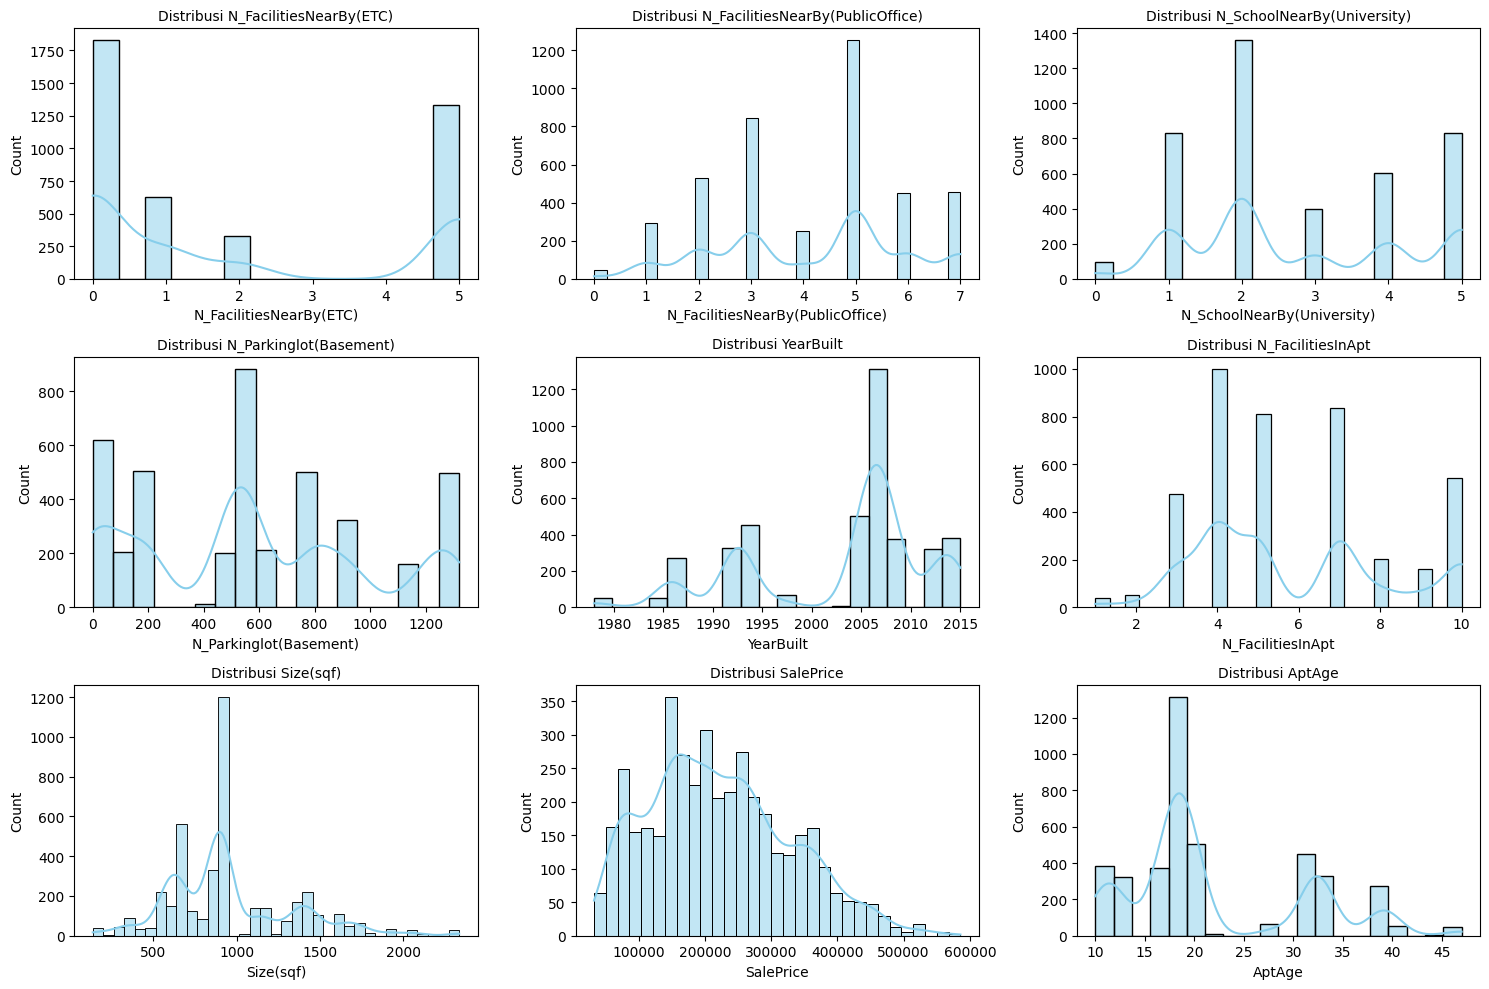

In [72]:
if 'AptAge' not in df.columns:
    df['AptAge'] = 2025 - df['YearBuilt']
    
num_cols = df_model.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribusi {col}", fontsize=10)
plt.tight_layout()
plt.show()

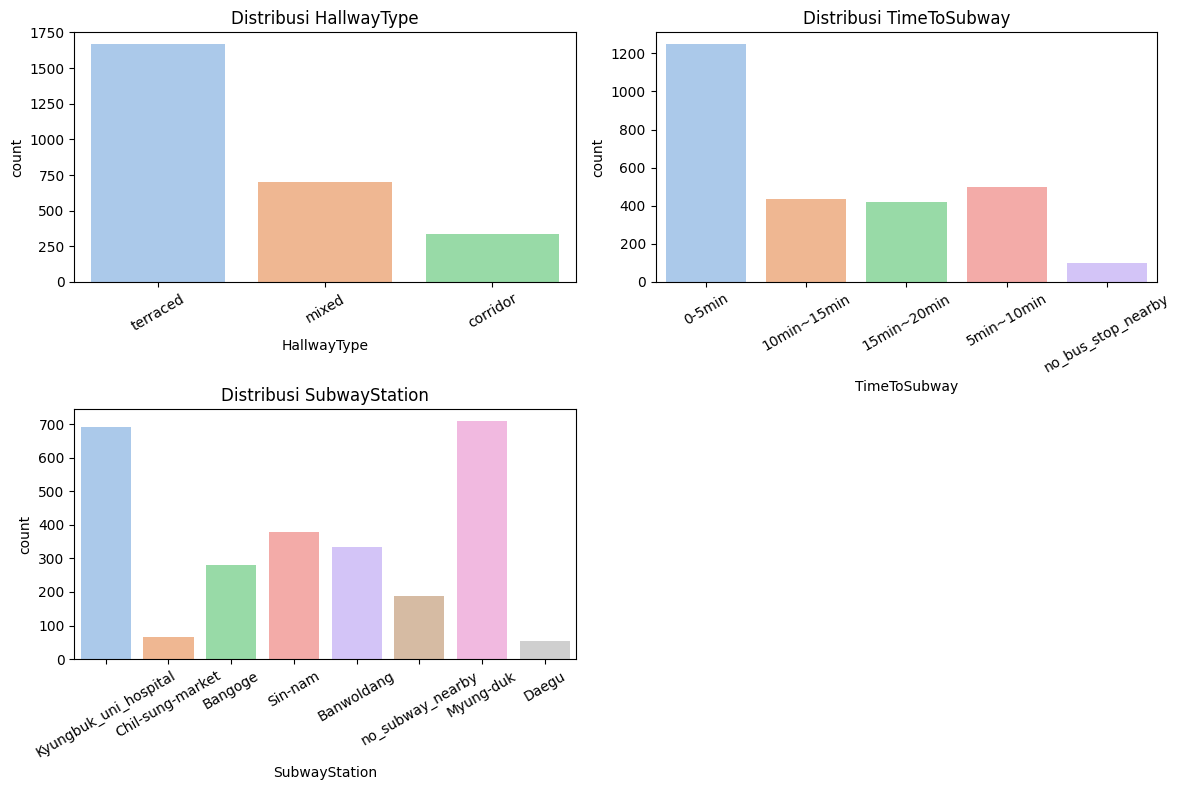

In [73]:
cat_cols = df_model.select_dtypes(include='object').columns

plt.figure(figsize=(12,8))
for i, col in enumerate(cat_cols, 1) :
    plt.subplot(2, 2, i)
    sns.countplot(df_model, x= col, palette='pastel')
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=30)
plt.tight_layout()

In [74]:
numeric_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove("SalePrice")  # kecuali target

for col in numeric_cols:
    Q1 = df_model[col].quantile(0.25)
    Q3 = df_model[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df_model[col] = np.where(df_model[col] < lower, lower,
                       np.where(df_model[col] > upper, upper, df_model[col]))

In [75]:
ordinal_map = [['0-5min', '5min~10min', '10min~15min', '15min~20min', 'no_bus_stop_nearby']]

In [76]:
num_features = [
    'N_FacilitiesNearBy(ETC)',
    'N_FacilitiesNearBy(PublicOffice)',
    'N_SchoolNearBy(University)',
    'N_Parkinglot(Basement)',
    'N_FacilitiesInApt',
    'Size(sqf)',    
    'AptAge'
]

cat_features = [
    'HallwayType',
    'SubwayStation'
]

ord_features = ['TimeToSubway']

In [77]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', RobustScaler())                     
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))    
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('ordinal', OrdinalEncoder(categories=ordinal_map))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features),
        ('ord', ordinal_transformer, ord_features)
    ], remainder='passthrough'
)

In [78]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['SalePrice', 'YearBuilt'], axis=1)
y = df_model['SalePrice']

In [79]:
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=1)

In [80]:

lr = LinearRegression()
ridge = Ridge(random_state=42)
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, n_estimators=300, learning_rate=0.1)


log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_ridge = TransformedTargetRegressor(ridge, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

In [81]:
models = [
    log_lr, log_ridge, log_knn, log_dt, log_rf, log_gb, log_xgb
]
model_names = [
    "Linear Regression",
    "Ridge Regressor",
    "KNN Regressor",
    "DecisionTree Regressor",
    "RandomForest Regressor",
    "GradientBoosting Regressor",
    "XGBoost Regressor"
]

In [82]:
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# List untuk simpan hasil
nilai_mean_rmse, nilai_std_rmse = [], []
nilai_mean_mae, nilai_std_mae = [], []
nilai_mean_mape, nilai_std_mape = [], []

# Evaluasi tiap model
for name, model in zip(model_names, models):
    estimator = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])

    # RMSE
    rmse_scores = cross_val_score(estimator, X_train, y_train, cv=crossval,
                                  scoring='neg_root_mean_squared_error')
    nilai_mean_rmse.append(rmse_scores.mean())
    nilai_std_rmse.append(rmse_scores.std())

    # MAE
    mae_scores = cross_val_score(estimator, X_train, y_train, cv=crossval,
                                 scoring='neg_mean_absolute_error')
    nilai_mean_mae.append(mae_scores.mean())
    nilai_std_mae.append(mae_scores.std())

    # MAPE
    mape_scores = cross_val_score(estimator, X_train, y_train, cv=crossval,
                                  scoring='neg_mean_absolute_percentage_error')
    nilai_mean_mape.append(mape_scores.mean())
    nilai_std_mape.append(mape_scores.std())

# Buat DataFrame hasil
results_df = pd.DataFrame(list(zip(
    model_names,
    nilai_mean_rmse, nilai_std_rmse,
    nilai_mean_mae, nilai_std_mae,
    nilai_mean_mape, nilai_std_mape
)), columns=[
    'Model',
    'Mean_RMSE','Std_RMSE',
    'Mean_MAE','Std_MAE',
    'Mean_MAPE','Std_MAPE'
])
display(results_df)

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-52351.455465,1816.480466,-42292.332552,1933.743808,-0.211268,0.009816
1,Ridge Regressor,-52422.728478,1881.001548,-42329.834041,1965.744457,-0.211287,0.009938
2,KNN Regressor,-49406.366257,637.987326,-38351.539706,493.167415,-0.188094,0.008216
3,DecisionTree Regressor,-46676.836443,1065.717854,-36787.499036,514.235773,-0.182261,0.005622
4,RandomForest Regressor,-46686.462567,1026.764249,-36792.687779,556.966565,-0.182120,0.005563
5,GradientBoosting Regressor,-46439.766379,849.352726,-36759.071878,764.896576,-0.181832,0.006470
6,XGBoost Regressor,-46748.684375,1059.826000,-36836.489062,575.330011,-0.183078,0.005525


In [83]:
# Top 2 models berdasarkan hasil benchmark
models_top2 = {
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}

score_rmse, score_mae, score_mape = [], [], []

# Prediksi pada test set
for name, model in models_top2.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit & predict
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    # Hitung metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    score_rmse.append(rmse)
    score_mae.append(mae)
    score_mape.append(mape)

# Buat DataFrame hasil
score_before_tuning = pd.DataFrame({
    'RMSE': score_rmse,
    'MAE': score_mae,
    'MAPE': score_mape
}, index=models_top2.keys())

display(score_before_tuning)

,RMSE,MAE,MAPE
GradientBoosting,46589.108388,38174.462035,0.194867
RandomForest,47081.263932,38246.709485,0.194085


In [84]:
# Hyperparameter Tuning
hyperparam_gb = {
    'model__n_estimators': [100, 200, 300, 500],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__max_depth': [3, 4, 5, 6],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__subsample': [0.6, 0.8, 1.0]
}

pipe_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

random_search = RandomizedSearchCV(
    estimator=pipe_gb,
    param_distributions=hyperparam_gb,
    n_iter=30,                  # coba 30 kombinasi
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['N_FacilitiesNearBy(ETC)',
                                                                                'N_FacilitiesNearBy(PublicOffice)',
                                                                                'N_SchoolNearBy(University)',
                                                                                'N_Parkinglot(Basement)',
                                                                                'N_FacilitiesInA...
                                              GradientBoostingRegressor(random_state=42))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.01, 0.05,
                                                                 0.1, 0.2],
                                        'model__max_depth': [3, 4, 5, 6],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 200, 300,
                                                                500],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [85]:
# Evaluasi best model di test set
best_gb_tuning = random_search.best_estimator_
y_pred_gb = best_gb_tuning.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae = mean_absolute_error(y_test, y_pred_gb)
mape = mean_absolute_percentage_error(y_test, y_pred_gb)


score_after_tuning = pd.DataFrame({
    'RMSE': [rmse],
    'MAE': [mae],
    'MAPE': [mape]
}, index=['GradientBoosting (after tuning)'])

score_after_tuning

,RMSE,MAE,MAPE
GradientBoosting (after tuning),46716.161234,38269.424476,0.196817


In [86]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['GradientBoosting']).T

,RMSE,MAE,MAPE
GradientBoosting,46589.108388,38174.462035,0.194867


In [87]:
score_after_tuning

,RMSE,MAE,MAPE
GradientBoosting (after tuning),46716.161234,38269.424476,0.196817


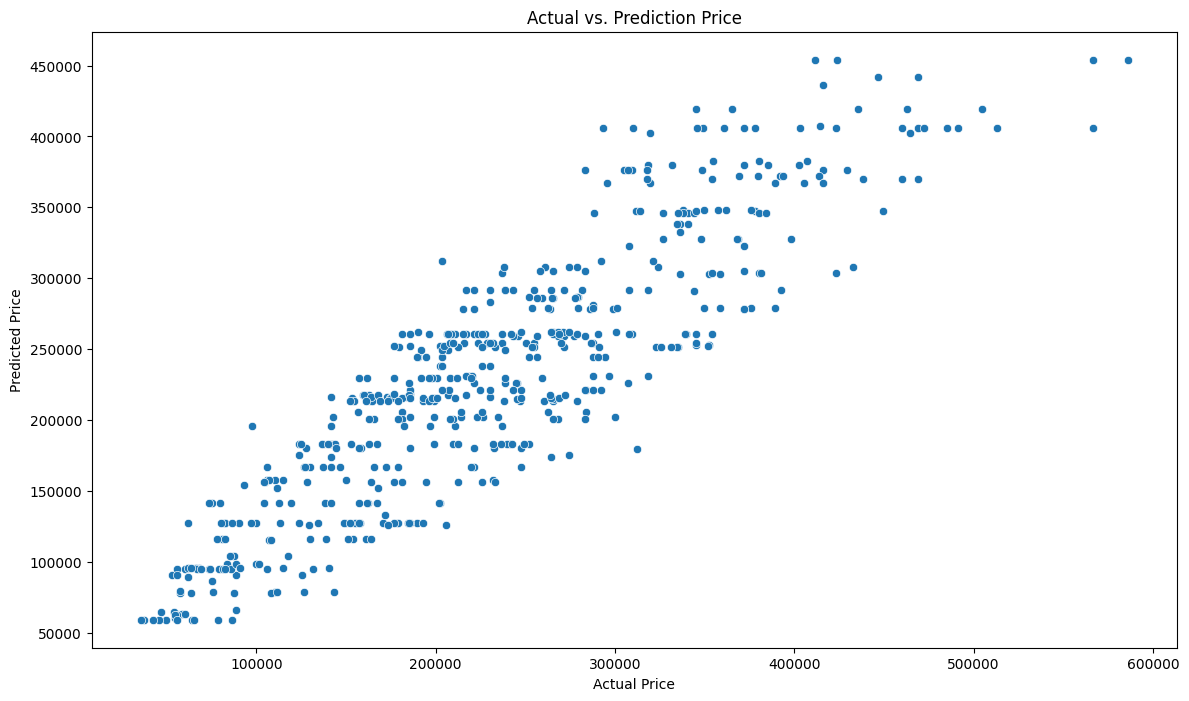

In [88]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_gb).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

## Conclusion

1. **Tujuan Project**  
   Project ini bertujuan untuk membangun model machine learning regresi yang mampu memprediksi harga jual apartemen di Kota Daegu berdasarkan berbagai faktor seperti ukuran unit, tahun pembangunan, jumlah fasilitas di sekitar, dan jarak ke stasiun subway.

2. **Model Terbaik**  
   Dari hasil *benchmarking* menggunakan berbagai algoritma (Linear Regression, Ridge, KNN, Decision Tree, Random Forest, Gradient Boosting, dan XGBoost), diperoleh bahwa Gradient Boosting Regressor memberikan performa terbaik dengan hasil sebagai berikut:

   | Model | RMSE | MAE | MAPE |
   |:--|--:|--:|--:|
   | Sebelum Tuning | 46,589 | 38,174 | 0.1948 |
   | Setelah Tuning | 46,716 | 38,269 | 0.1968 |

   Walaupun performa setelah tuning sedikit menurun secara numerik, model hasil tuning memiliki parameter yang lebih optimal dan lebih stabil terhadap variasi data (tidak overfitting).

In [89]:
import pickle

# Simpan model terbaik (Gradient Boosting Tuned)
with open('best_gradientboosting_model.pkl', 'wb') as file:
    pickle.dump(best_gb_tuning, file)

print(" Model berhasil disimpan ke 'best_gradientboosting_model.pkl'")


 Model berhasil disimpan ke 'best_gradientboosting_model.pkl'


In [92]:
df_model.to_csv("data_daegu_apartment_cleaned.csv")
print(" Model berhasil disimpan ke 'data_daegu_apartment_cleaned.csv'")

 Model berhasil disimpan ke 'data_daegu_apartment_cleaned.csv'


In [90]:
# filename = 'best_gradientboosting_model.pkl'
# loaded_model = pickle.load(open(filename, 'rb'))

In [91]:
import sklearn
print("Versi scikit-learn saat training:", sklearn.__version__)

Versi scikit-learn saat training: 1.6.1
